In [ ]:
!git clone https://github.com/xxjimin/DPR_hw.git

Cloning into 'DPR_hw'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (314/314), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 314 (delta 31), reused 295 (delta 17), pack-reused 0
Receiving objects: 100% (314/314), 35.37 MiB | 20.33 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [ ]:
cd DPR_hw

/content/DPR_hw


In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
import os
import numpy as np
from PIL import Image

image_directory_path = './BBox-Label-Tool-Multi-Class/dataset'
label_directory_path = './BBox-Label-Tool-Multi-Class/Labels/001'

image_files = [os.path.join(image_directory_path, file) for file in os.listdir(image_directory_path) if file.endswith('.png')]

txt_files = [os.path.join(label_directory_path, file) for file in os.listdir(label_directory_path) if file.endswith('.txt')]


# 이미지 파일명과 라벨 파일명에서 확장자를 제거하여 비교
image_files_base = [os.path.splitext(os.path.basename(file))[0] for file in image_files]
txt_files_base = [os.path.splitext(os.path.basename(file))[0] for file in txt_files]

# 이미지 파일과 라벨 파일을 정렬
png_files = sorted(image_files, key=lambda x: os.path.splitext(os.path.basename(x))[0])
txt_files = sorted(txt_files, key=lambda x: os.path.splitext(os.path.basename(x))[0])
print(png_files, txt_files)


images = []

# 모든 이미지를 동일한 크기로 조정
target_size = (320,240)

# 각 PNG 파일을 numpy 배열로 변환하고 정규화
for file in png_files:

    image = Image.open(file).convert('RGB')
    image = image.resize(target_size, Image.ANTIALIAS)

    # 이미지 numpy 배열로 변환
    image_array = np.array(image)

    # 정규화 (0 ~ 1 범위로)
    image_array = image_array / 255.0
    images.append(image_array)

# 모든 이미지 배열을 하나의 numpy 배열로
images_array = np.array(images)



print(f"Total images: {len(images_array)}, Shape of each image: {images_array[0].shape}")


# 라벨 정보를 저장할 리스트 초기화
labels = []

# 모든 이미지를 동일한 크기로 조정
target_size = (320, 240)

# 각 이미지 파일과 라벨 텍스트 파일에 대해 처리
for image_file, txt_file in zip(image_files, txt_files):

    with Image.open(image_file) as img:
        original_width, original_height = img.size


    with open(txt_file, 'r') as f:
        lines = f.readlines()
        if len(lines) > 1:
            # 두 번째 줄을 공백 기준으로 분리
            label_info = lines[1].strip().split()

            # 좌표 정보 추출 및 변환
            x1 = float(label_info[0]) / original_width * target_size[0]
            y1 = float(label_info[1]) / original_height * target_size[1]
            x2 = float(label_info[2]) / original_width * target_size[0]
            y2 = float(label_info[3]) / original_height * target_size[1]

            # 정규화
            x1 = x1 / target_size[0]
            y1 = y1 / target_size[1]
            x2 = x2 / target_size[0]
            y2 = y2 / target_size[1]


            if label_info[4]=='dog':
              classnum = 0
            else:
              classnum= 1
            transformed_label_info = [classnum, x1, y1, x2-x1, y2-y1]

            # 리스트에 추가
            labels.append(transformed_label_info)

# numpy 배열로 변환
labels_array = np.array(labels)
print(labels_array)


print(f"Shape of labels array: {labels_array.shape}")



['./BBox-Label-Tool-Multi-Class/dataset/0.png', './BBox-Label-Tool-Multi-Class/dataset/12.png', './BBox-Label-Tool-Multi-Class/dataset/13.png', './BBox-Label-Tool-Multi-Class/dataset/15.png', './BBox-Label-Tool-Multi-Class/dataset/16.png', './BBox-Label-Tool-Multi-Class/dataset/2.png', './BBox-Label-Tool-Multi-Class/dataset/21.png', './BBox-Label-Tool-Multi-Class/dataset/3.png', './BBox-Label-Tool-Multi-Class/dataset/4.png', './BBox-Label-Tool-Multi-Class/dataset/5.png', './BBox-Label-Tool-Multi-Class/dataset/6.png', './BBox-Label-Tool-Multi-Class/dataset/7.png', './BBox-Label-Tool-Multi-Class/dataset/8.png', './BBox-Label-Tool-Multi-Class/dataset/9.png', './BBox-Label-Tool-Multi-Class/dataset/cat_data1.png', './BBox-Label-Tool-Multi-Class/dataset/cat_data10.png', './BBox-Label-Tool-Multi-Class/dataset/cat_data11.png', './BBox-Label-Tool-Multi-Class/dataset/cat_data12.png', './BBox-Label-Tool-Multi-Class/dataset/cat_data13.png', './BBox-Label-Tool-Multi-Class/dataset/cat_data2.png', '.

<ipython-input-5-0bef34f66ef4>:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(target_size, Image.ANTIALIAS)


Total images: 89, Shape of each image: (240, 320, 3)
[[0.         0.24814815 0.18888889 0.27777778 0.33333333]
 [0.         0.23762376 0.10555556 0.74257426 0.64444444]
 [0.         0.21568627 0.04444444 1.19607843 0.85555556]
 [0.         0.48571429 0.06666667 0.44761905 0.40555556]
 [0.         0.11111111 0.07222222 0.73703704 0.83333333]
 [0.         0.38823529 0.08280255 0.32941176 0.42038217]
 [0.         0.04152249 0.09493671 0.3183391  0.56962025]
 [0.         0.33739837 0.08888889 0.39430894 0.47777778]
 [0.         0.21111111 0.07222222 0.42962963 0.46666667]
 [0.         0.33333333 0.12101911 0.47777778 0.57324841]
 [0.         0.82840237 0.07692308 0.49704142 0.42011834]
 [0.         0.18343195 0.07692308 0.56213018 0.43786982]
 [0.         0.25139665 0.14012739 0.56424581 0.5477707 ]
 [0.         0.09803922 0.10828025 0.61960784 0.8089172 ]
 [1.         0.0037037  0.02777778 0.5962963  0.87777778]
 [1.         0.20437956 0.02222222 0.47810219 0.60555556]
 [1.         0.4757

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

0.0 0.2111111111111111 0.07222222222222222 0.4296296296296296 0.4666666666666667


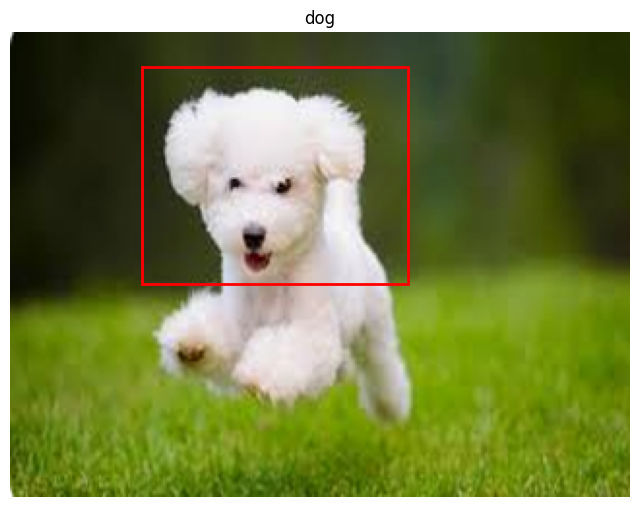

In [ ]:
train_imgs, test_imgs, train_labels, test_labels = train_test_split(images_array, labels_array, test_size=0.2, random_state=42)
classes = ['dog', 'cat']

idx = 30


train_img = train_imgs[idx]
c, x, y, w, h = train_labels[idx]
print(c,x,y,w,h)


# rescaling
x, w = x*320, w*320
y, h = y*240, h*240

rect = patches.Rectangle((x, y),
                         w,
                         h,
                         linewidth = 2,
                         edgecolor = 'r',
                         facecolor = 'none')

fig, ax = plt.subplots(figsize = (8,8))
plt.title(classes[int(c)])
plt.imshow(train_img)
ax.add_patch(rect)
plt.axis('off')
plt.show()



In [ ]:
import tensorflow as tf
feature_extractor = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (240, 320, 3)),

    tf.keras.layers.MaxPool2D(pool_size = (2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'SAME'),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'SAME'),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'SAME'),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'SAME'),

    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', padding = 'SAME'),

    tf.keras.layers.GlobalAveragePooling2D()
])

In [ ]:
classifier = tf.keras.layers.Dense(256, activation = 'relu')(feature_extractor.output)
classifier = tf.keras.layers.Dense(256, activation = 'relu')(classifier)
classifier = tf.keras.layers.Dense(2, activation = 'softmax', name = 'cls')(classifier)

In [ ]:
bb_regressor = tf.keras.layers.Dense(256, activation = 'relu')(feature_extractor.output)
bb_regressor = tf.keras.layers.Dense(256, activation = 'relu')(bb_regressor)
bb_regressor = tf.keras.layers.Dense(4, name = 'bbox')(bb_regressor)

In [ ]:
object_detection = tf.keras.models.Model(inputs = feature_extractor.input,
                                         outputs = [classifier, bb_regressor])

In [ ]:
object_detection.compile(optimizer = 'adam',
                         loss = {'cls': 'sparse_categorical_crossentropy',
                                 'bbox': 'mse'},
                         loss_weights = {'cls': 1,
                                         'bbox': 1})

In [ ]:
train_cls = train_labels[:,:1]
train_bbox = train_labels[:,1:]

print(train_labels.shape)
print(train_cls.shape)
print(train_bbox.shape)

(71, 5)
(71, 1)
(71, 4)


In [ ]:
object_detection.fit(x = train_imgs.astype(np.float64),
                     y = {'cls': train_cls.astype(np.float64), 'bbox': train_bbox.astype(np.float64)},
                     epochs = 100)


Epoch 1/100
3/3 [==============================] - 23s 4s/step - loss: 0.8611 - cls_loss: 0.6960 - bbox_loss: 0.1650
Epoch 2/100
3/3 [==============================] - 13s 4s/step - loss: 0.7571 - cls_loss: 0.7020 - bbox_loss: 0.0551
Epoch 3/100
3/3 [==============================] - 11s 3s/step - loss: 0.7483 - cls_loss: 0.6921 - bbox_loss: 0.0562
Epoch 4/100
3/3 [==============================] - 12s 3s/step - loss: 0.7412 - cls_loss: 0.7016 - bbox_loss: 0.0396
Epoch 5/100
3/3 [==============================] - 14s 4s/step - loss: 0.7400 - cls_loss: 0.6962 - bbox_loss: 0.0438
Epoch 6/100
3/3 [==============================] - 18s 5s/step - loss: 0.7330 - cls_loss: 0.6937 - bbox_loss: 0.0393
Epoch 7/100
3/3 [==============================] - 15s 4s/step - loss: 0.7270 - cls_loss: 0.6929 - bbox_loss: 0.0341
Epoch 8/100
3/3 [==============================] - 16s 5s/step - loss: 0.7254 - cls_loss: 0.6925 - bbox_loss: 0.0329
Epoch 9/100
3/3 [==============================] - 16s 5s/step -

In [ ]:
#object_detection.save('my_best_model.h5')

!pip install tensorflow
!pip install transformers


!wget https://github.com/xxjimin/DPR_hw/raw/main/my_best_model2.h5 -O model.h5

import tensorflow as tf

model = tf.keras.models.load_model('model.h5')


import numpy as np




--2024-06-02 10:20:54--  https://github.com/xxjimin/DPR_hw/raw/main/my_best_model2.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xxjimin/DPR_hw/main/my_best_model2.h5 [following]
--2024-06-02 10:20:55--  https://raw.githubusercontent.com/xxjimin/DPR_hw/main/my_best_model2.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160840 (9.7M) [application/octet-stream]
Saving to: ‘model.h5’

model.h5            100%[===================>]   9.69M  58.2MB/s    in 0.2s    

2024-06-02 10:20:55 (58.2 MB/s) - ‘model.h5’ saved [10160840/10160840]



In [ ]:
idx = 28

# true label
c_label, x_label, y_label, w_label, h_label = train_labels[idx]

# rescaling
x_label, w_label = x_label*320, w_label*320
y_label, h_label = y_label*240, h_label*240

rect_label = patches.Rectangle((x_label, y_label),
                               w_label,
                               h_label,
                               linewidth = 2,
                               edgecolor = 'r',
                               facecolor = 'none')

# predict
c_pred, bbox = model.predict(train_imgs[[idx]])
print(model.predict(train_imgs[[idx]]))
print(bbox)

x, y, w, h = bbox[0]
# rescaling
x, w = x*320, w*320
y, h = y*240, h*240
rect = patches.Rectangle((x, y),
                         w,
                         h,
                         linewidth = 2,
                         edgecolor = 'b',
                         facecolor = 'none')

1/1 [==============================] - 0s 298ms/step
[array([[0.00954176, 0.99045825]], dtype=float32), array([[0.37714252, 0.07119778, 0.95909274, 0.83878666]], dtype=float32)]
[[0.37714252 0.07119778 0.95909274 0.83878666]]


In [ ]:
print(classes[int(c_label)])
print(classes[np.argmax(c_pred)])

cat
cat


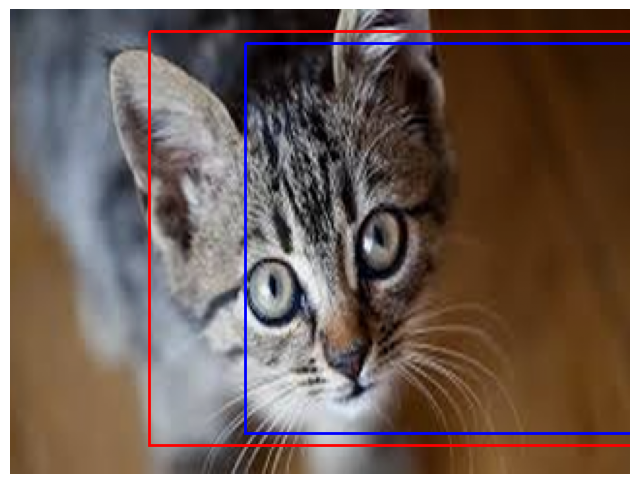

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
plt.imshow(train_imgs[idx])
ax.add_patch(rect_label)
ax.add_patch(rect)
plt.axis('off')
plt.show()

In [ ]:
#test set 사용

idx = 12


# true label
c_label, x_label, y_label, w_label, h_label = test_labels[idx]
print(c_label, x_label, y_label, w_label, h_label)
print(classes)

# rescaling
x_label, w_label = x_label*320, w_label*320
y_label, h_label = y_label*240, h_label*240

rect_label = patches.Rectangle((x_label, y_label),
                               w_label,
                               h_label,
                               linewidth = 2,
                               edgecolor = 'r',
                               facecolor = 'none')

# predict
c_pred, bbox = model.predict(test_imgs[[idx]])

x, y, w, h = bbox[0]
print(x,y,h,w)

# rescaling
x, w = x*320, w*320
y, h = y*240, h*240
rect = patches.Rectangle((x, y),
                         w,
                         h,
                         linewidth = 2,
                         edgecolor = 'b',
                         facecolor = 'none')

1.0 0.12802768166089964 0.056962025316455694 0.42560553633218 0.6772151898734178
['dog', 'cat']
1/1 [==============================] - 0s 113ms/step
0.29165152 0.13272002 0.5149897 0.4191047


In [ ]:
print(classes[int(c_label)])
print(classes[np.argmax(c_pred)])

cat
cat


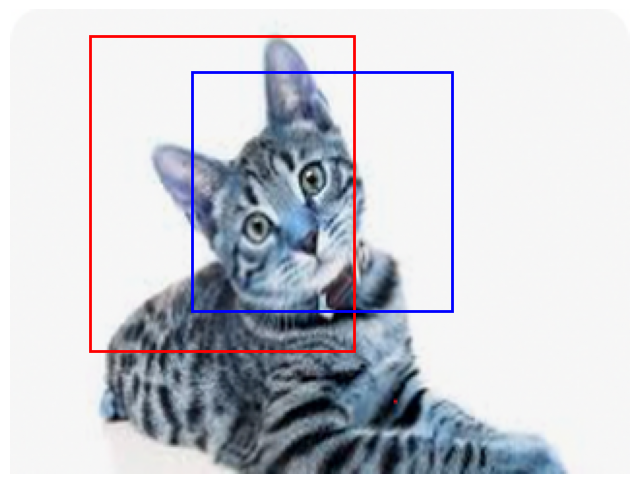

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
plt.imshow(test_imgs[idx])
ax.add_patch(rect_label)
ax.add_patch(rect)
plt.axis('off')
plt.show()

In [ ]:


test_cls = test_labels[:, :1].astype(np.float32)
test_bbox = test_labels[:, 1:].astype(np.float32)

# IoU 계산 함수
def calculate_iou(bbox_true, bbox_pred):
    x_true, y_true, w_true, h_true = tf.split(bbox_true, 4, axis=-1)
    x_pred, y_pred, w_pred, h_pred = tf.split(bbox_pred, 4, axis=-1)

    x_true1, y_true1 = x_true - w_true / 2, y_true - h_true / 2
    x_true2, y_true2 = x_true + w_true / 2, y_true + h_true / 2
    x_pred1, y_pred1 = x_pred - w_pred / 2, y_pred - h_pred / 2
    x_pred2, y_pred2 = x_pred + w_pred / 2, y_pred + h_pred / 2

    xi1 = tf.maximum(x_true1, x_pred1)
    yi1 = tf.maximum(y_true1, y_pred1)
    xi2 = tf.minimum(x_true2, x_pred2)
    yi2 = tf.minimum(y_true2, y_pred2)

    inter_area = tf.maximum(xi2 - xi1, 0) * tf.maximum(yi2 - yi1, 0)
    box_true_area = (x_true2 - x_true1) * (y_true2 - y_true1)
    box_pred_area = (x_pred2 - x_pred1) * (y_pred2 - y_pred1)
    union_area = box_true_area + box_pred_area - inter_area

    iou = inter_area / tf.maximum(union_area, 1e-10)
    return iou

# 모델 예측
predictions = model.predict(test_imgs)
cls_pred = np.argmax(predictions[0], axis=-1)
bbox_pred = predictions[1]

# 클래스 정확도 계산
#print(cls_pred)
#print(cls_true)
cls_true = test_cls.flatten()
cls_accuracy = np.mean(cls_pred == cls_true)

# IoU 계산
ious = [calculate_iou(test_bbox[i], bbox_pred[i]).numpy()[0] for i in range(len(test_bbox))]
mean_iou = np.mean(ious)

# 결과 출력
print(f"Class Accuracy: {cls_accuracy}")
print(f"Mean IoU: {mean_iou}")




1/1 [==============================] - 1s 978ms/step
Class Accuracy: 0.5555555555555556
Mean IoU: 0.3317810893058777
